In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dir = r'./customers.csv'

df = pd.read_csv(dir)

df.head(10)

Matplotlib is building the font cache; this may take a moment.


,id,gender,age,number_of_kids
0,979863,MALE,26,2
1,780123,MALE,60,2
2,614848,MALE,45,4
3,775046,MALE,62,3
4,991601,MALE,23,0
5,670477,MALE,36,1
6,194053,MALE,35,0
7,364596,FEMALE,36,4
8,640428,MALE,28,0
9,154517,MALE,25,2


Mean Squared Error: 1754318687330.664
R-Squared: 0.6529242642153184


Text(0.5, 1.0, 'Actual vs Predicted Prices')

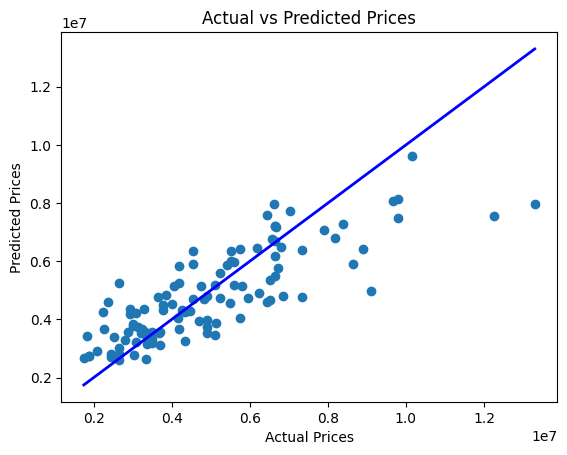

In [6]:
df_housing = pd.read_csv("Housing.csv")

# print(df_housing.head(1000))
# performing one hot encoding
dataset_encoded=pd.get_dummies(df_housing,columns=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus'], drop_first=True)
# Preparing the feature and target variable
x  = dataset_encoded.drop('price',axis=1) # feature variable
y  = dataset_encoded['price'] # target variable

# Splitting the dataset into training and test set. Model will be trained with 80% of the samples and 20% of the samples will be left for testing the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

linreg = LinearRegression()
# Fitting the model 
linreg.fit(x_train,y_train)

# Making Predictions
y_predicted = linreg.predict(x_test)

mse = mean_squared_error(y_test, y_predicted)
# Compute the coefficient of determination
r2= r2_score(y_test, y_predicted)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

plt.scatter(y_test, y_predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

Plot of housing saved


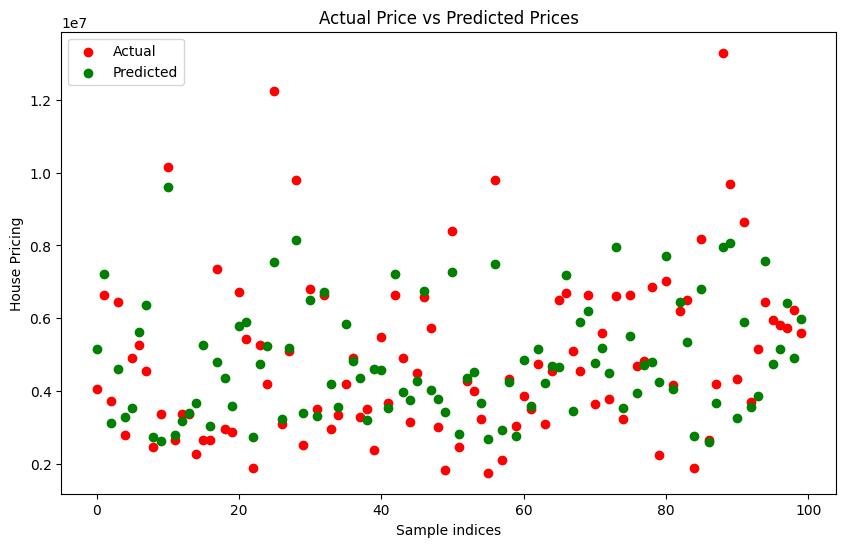

In [ ]:
actual_prices = list(y_test)
predicted_prices = list(y_predicted)

# print("\n Actual Prices vs Predicted Prices")
# print(f"{'Actual':<15}{'Predicted':<15}")

# for actual, predicted in zip(actual_prices[:100],predicted_prices[:100]):
#     print(f"{actual:<15}{predicted:<15.2f}")

plt.figure(figsize=(10,6))
plt.scatter(range(100), y_test[:100], color='red', label='Actual')
plt.scatter(range(100), y_predicted[:100], color='green', label='Predicted')
plt.title('Actual Price vs Predicted Prices')
plt.xlabel('Sample Indices')
plt.ylabel('Housing Prices')
plt.legend()
